In [1]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the USvideos.csv
import pandas as pd 
yt_df = pd.read_csv("USvideos.csv")
yt_df.head()

In [ ]:
# Drop the non-beneficial ID columns
yt_df = yt_df.drop(columns=["channel_title", "title", "tags", "video_id", "thumbnail_link", "ratings_disabled", "video_error_or_removed", "description", "comments_disabled" ], axis=0)
yt_df.head()

In [6]:
yt_df.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [7]:
yt_df['category_id']= yt_df['category_id'].replace([24, 10, 26, 23, 22, 25, 28, 1, 17, 27, 15, 20, 19, 2, 29, 43], ['Entertainment', 'Music', 'How to and Style', 'Comedy', 'People and Blogs', 'News and Politics', 'Science and Technology', 'Film and Animation', 'Sports', 'Education', 'Pets and Animals', 'Gaming', 'Travel and Events', 'Autos and Vehicles', 'Non-profits and Activism', 'Shows'])
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People and Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
yt_df= yt_df.category_id.value_counts()
yt_df

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News and Politics           2487
Science and Technology      2401
Film and Animation          2345
Sports                      2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Autos and Vehicles           384
Non-profits and Activism      57
Shows                         57
Name: category_id, dtype: int64

<AxesSubplot:ylabel='Density'>

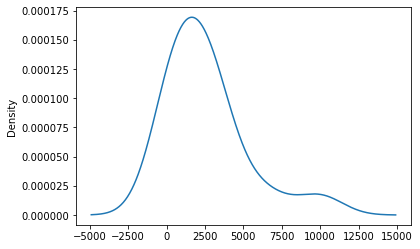

In [9]:
yt_df.plot.density()